# Processamento Digital de Imagens

1001527 - Turma A

Prof. Cesar Henrique Comin

## Análise experimental de complexidade da convolução espacial e por FFT

### Equipe
Igor Teixeira Machado RA: 769708

Rafael Vinícius Passador RA: 790036

## Introdução

Dada uma imagem $f$ e um filtro $w$ de tamanho $a\times b$, a correlação-cruzada para cada pixel $(x,y)$ da imagem é calculada pela fórmula

\begin{equation}
g(x,y)=\sum_{s=0}^{a}\sum_{t=0}^{b}w(s,t)f(x+s-\frac{a}{2}, y+t-\frac{b}{2})
\end{equation}

A convolução é avaliada para todos os valores das variáveis de deslocamento x e y de modo que o centro de w visite cada pixel em f, que supõe-se ter sido preenchido. Analogamente, utiliza-se a mesma equação para calcular a convolução entre um filtro e um sinal.


A FFT y(k) de comprimento $N$ da $N-ésima$ sequência de x(n) é definida como

\begin{equation}
y(k) = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x(n) 
\end{equation}

e sua inversa é definida como

\begin{equation}
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y(k)
\end{equation}

A partir dessas equações, utiliza-se as funções de implementação da biblioteca scipy.fft, a qual aplica as equações supracitadas de convolução e FFT.

## Instalações Necessárias

* pip install numpy
* python -m pip install -U matplotlib
* pip install scipy

## Implementação

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift
import timeit
import random
import os

In [32]:
def random_matrix(n,m):
    matrix = np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            matrix[i][j] = random.randint(0, 255)

    return matrix

def filtroTransform(filtro, img):

    filtro = filtro/filtro.sum()

    num_rows, num_cols = img.shape
    img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), mode='constant', constant_values = 0)
    filt_image = np.zeros([2 * num_rows, 2 * num_cols])
    filt_image[num_rows - 3:num_rows + 4, num_cols - 3:num_cols + 4] = filtro

    filt_image = fftshift(filt_image)
    Ffilt = fft2(filt_image)
    freq_r = fftfreq(2 * num_rows)
    freq_c = fftfreq(2 * num_cols)

    Ffilt = fftshift(Ffilt)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)

    return Ffilt, freq_r, freq_c

def testeTempoExecucao(sinal, filtro, numeroExecucoes, isImg):

    #filtro, _, _ = filtroTransform(filtro, sinal)
    imagemOuSinal = "imagem: " if isImg else "sinal: "
    convolveDirect = np.zeros(sinal.shape, dtype=np.uint16)
    convolveFFT = np.zeros(sinal.shape, dtype=np.uint16)
    convolveDirect_time = timeit.timeit(convolveDirect := lambda : (signal.convolve(sinal, filtro, method='direct')), number = numeroExecucoes)
    convolveFFT_time = timeit.timeit(convolveFFT := lambda : (signal.convolve(sinal, filtro, method='fft')), number = numeroExecucoes)
    print("Tempo do método direto: %f" % convolveDirect_time + " Tamanho do " + imagemOuSinal + str(sinal.shape) +
    " Tamanho do filtro: " + str(filtro.shape))
    print("Tempo do método FFT: %f" % convolveFFT_time + " Tamanho do " + "sinal: " + imagemOuSinal + str(sinal.shape) +
    " Tamanho do filtro: " + str(filtro.shape))
    compararTempoMetodos(convolveDirect_time, convolveFFT_time)

    return convolveDirect, convolveFFT

def compararTempoMetodos(timeDirect, timeFFT):

    print("Diferença entre os tempos: " + str(abs(timeFFT - timeDirect)))

    if timeDirect < timeFFT:
        print("Método direto é mais rápido")
    else:
        print("Método FFT é mais rápido")
    pass

In [33]:
# Filtro fixo e sinal váriavel
filtro = random_matrix(5,5)
for i in range(2, 100):
    sinal = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10, False)

Tempo do método direto: 0.002945 Tamanho do sinal: 
Tempo do método FFT: 0.006898 Tamanho do sinal: 
Diferença entre os tempos: 0.003953499995986931
Método direto é mais rápido
Tempo do método direto: 0.000703 Tamanho do sinal: 
Tempo do método FFT: 0.002595 Tamanho do sinal: 
Diferença entre os tempos: 0.0018922000017482787
Método direto é mais rápido
Tempo do método direto: 0.000469 Tamanho do sinal: 
Tempo do método FFT: 0.003364 Tamanho do sinal: 
Diferença entre os tempos: 0.0028949000115972012
Método direto é mais rápido
Tempo do método direto: 0.001536 Tamanho do sinal: 
Tempo do método FFT: 0.004524 Tamanho do sinal: 
Diferença entre os tempos: 0.0029876000044168904
Método direto é mais rápido
Tempo do método direto: 0.001430 Tamanho do sinal: 
Tempo do método FFT: 0.002076 Tamanho do sinal: 
Diferença entre os tempos: 0.0006457999988924712
Método direto é mais rápido
Tempo do método direto: 0.001374 Tamanho do sinal: 
Tempo do método FFT: 0.003007 Tamanho do sinal: 
Diferença 

In [34]:
# sinal fixo e filtro variável
sinal = random_matrix(50, 50)
for i in range(2, 10):
    filtro = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10, False)

Tempo do método direto: 0.007136 Tamanho do sinal: 
Tempo do método FFT: 0.006516 Tamanho do sinal: 
Diferença entre os tempos: 0.0006201000069268048
Método FFT é mais rápido
Tempo do método direto: 0.012684 Tamanho do sinal: 
Tempo do método FFT: 0.006075 Tamanho do sinal: 
Diferença entre os tempos: 0.006609300005948171
Método FFT é mais rápido
Tempo do método direto: 0.017216 Tamanho do sinal: 
Tempo do método FFT: 0.007347 Tamanho do sinal: 
Diferença entre os tempos: 0.009868999986792915
Método FFT é mais rápido
Tempo do método direto: 0.040587 Tamanho do sinal: 
Tempo do método FFT: 0.005020 Tamanho do sinal: 
Diferença entre os tempos: 0.03556659999594558
Método FFT é mais rápido
Tempo do método direto: 0.067003 Tamanho do sinal: 
Tempo do método FFT: 0.007269 Tamanho do sinal: 
Diferença entre os tempos: 0.05973380000796169
Método FFT é mais rápido
Tempo do método direto: 0.082093 Tamanho do sinal: 
Tempo do método FFT: 0.007088 Tamanho do sinal: 
Diferença entre os tempos: 0.0

(378, 400)
imagem: (378, 400) Tamanho do filtro: (2, 2)
imagem: (378, 400) Tamanho do filtro: (2, 2)
Diferença entre os tempos: 0.21201770000334363
Método FFT é mais rápido
imagem: (378, 400) Tamanho do filtro: (3, 3)
imagem: (378, 400) Tamanho do filtro: (3, 3)
Diferença entre os tempos: 0.46059310001146514
Método FFT é mais rápido
imagem: (378, 400) Tamanho do filtro: (4, 4)
imagem: (378, 400) Tamanho do filtro: (4, 4)
Diferença entre os tempos: 1.080851500009885
Método FFT é mais rápido
imagem: (378, 400) Tamanho do filtro: (5, 5)
imagem: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.6720220999995945
Método FFT é mais rápido
imagem: (378, 400) Tamanho do filtro: (6, 6)
imagem: (378, 400) Tamanho do filtro: (6, 6)
Diferença entre os tempos: 1.7403246000030776
Método FFT é mais rápido
imagem: (378, 400) Tamanho do filtro: (7, 7)
imagem: (378, 400) Tamanho do filtro: (7, 7)
Diferença entre os tempos: 3.2731979999953182
Método FFT é mais rápido
imagem: (378, 400) Tam

KeyboardInterrupt: 

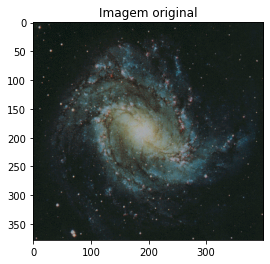

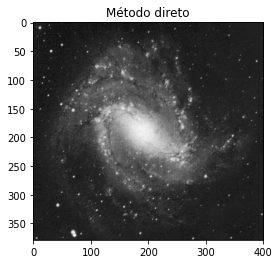

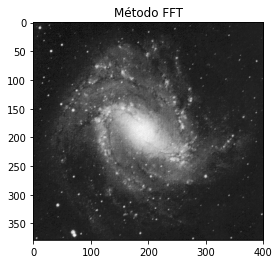

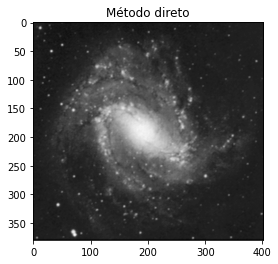

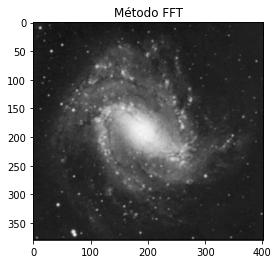

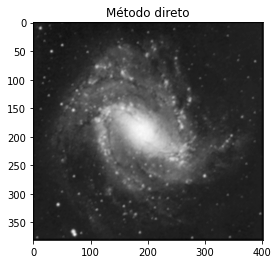

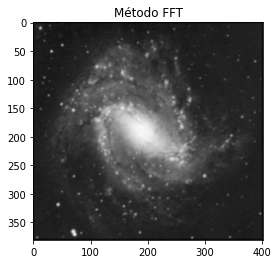

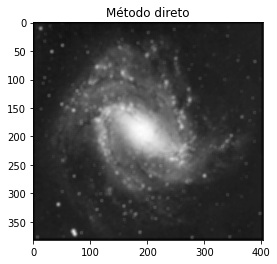

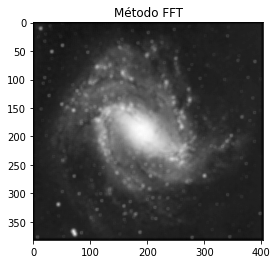

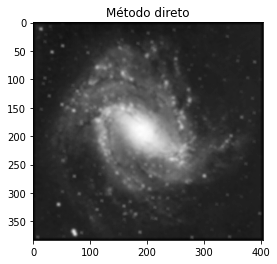

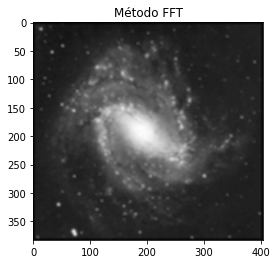

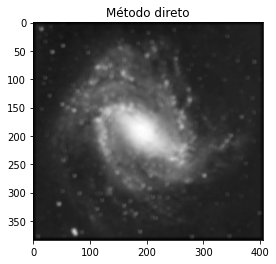

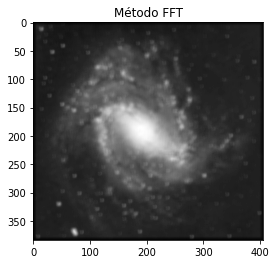

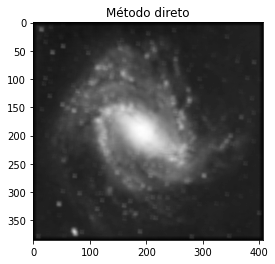

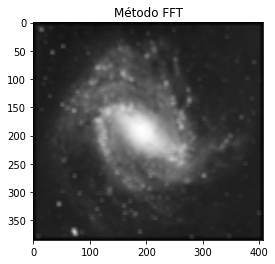

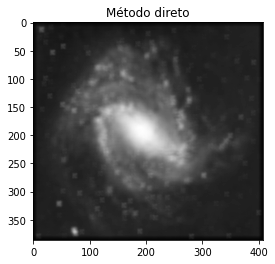

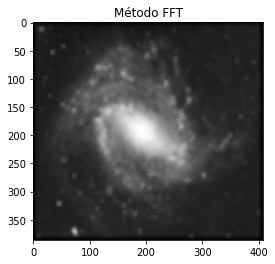

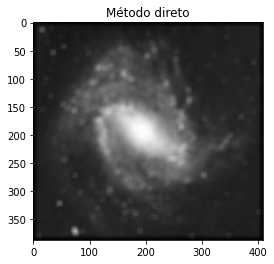

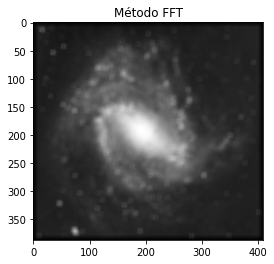

In [35]:
# imagem fixa e filtro variável
img = plt.imread('Fotos/m83.tif')
plt.figure()
plt.imshow(img, cmap='gray')
plt.title("Imagem original")
img = img[:,:,0]
print(img.shape)
for i in range(2, 15):
    filtro = random_matrix(i, i)
    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10, True)
    plt.figure()
    plt.imshow(imgDirect(), cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT(), cmap='gray')
    plt.title("Método FFT")

Tempo do método direto: 3.263979 Tamanho do sinal: (640, 480) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.370087 Tamanho do sinal: (640, 480) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.8938920000073267
Método FFT é mais rápido
Tempo do método direto: 1.471793 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.175465 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.296327799995197
Método FFT é mais rápido
Tempo do método direto: 1.818576 Tamanho do sinal: (537, 358) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.236458 Tamanho do sinal: (537, 358) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.582118199992692
Método FFT é mais rápido
Tempo do método direto: 3.434381 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.475495 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.9588863999815658
Método FFT é mais rápido
Tempo do método direto: 3.

C:\Users\iteix\AppData\Local\Temp\ipykernel_15664\1705327343.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Tempo do método direto: 3.259526 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.426801 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.832725300002494
Método FFT é mais rápido
Tempo do método direto: 2.630538 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.331823 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.29871559998719
Método FFT é mais rápido
Tempo do método direto: 7.368561 Tamanho do sinal: (773, 1076) Tamanho do filtro: (5, 5)
Tempo do método FFT: 1.011319 Tamanho do sinal: (773, 1076) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 6.357241899997462
Método FFT é mais rápido


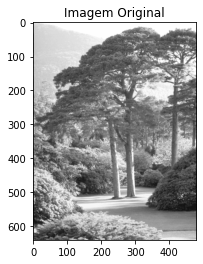

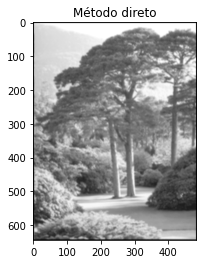

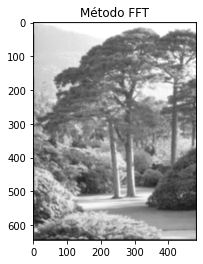

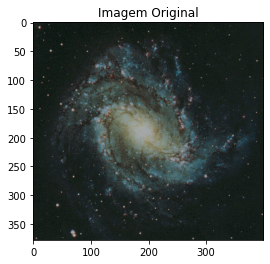

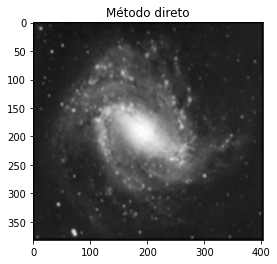

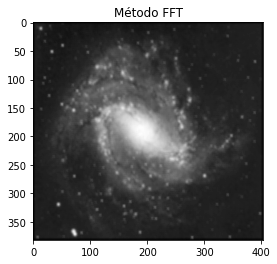

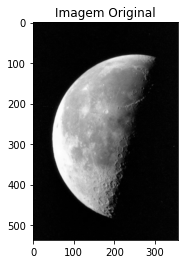

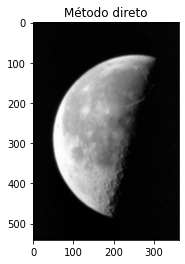

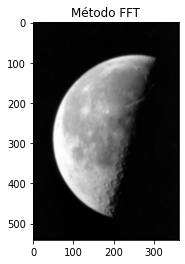

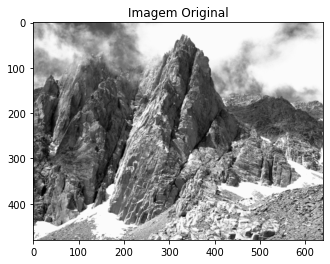

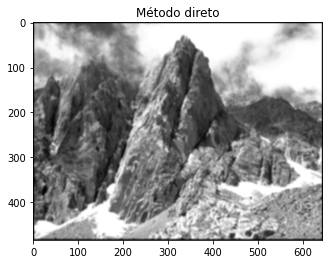

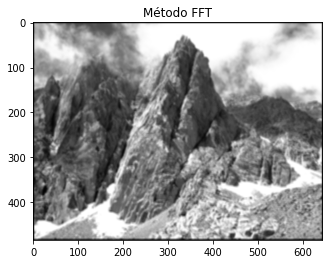

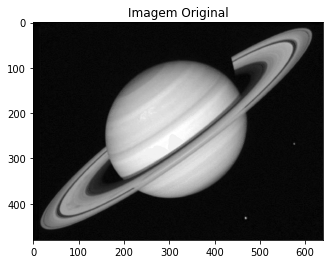

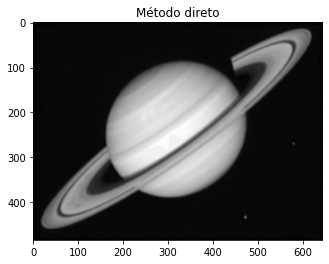

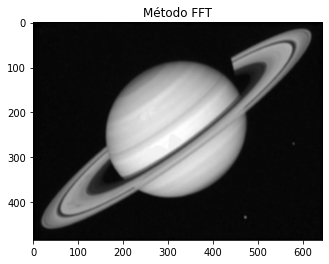

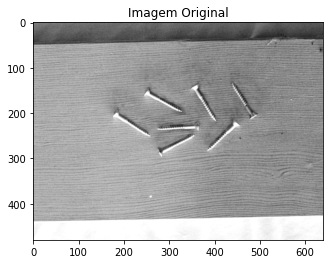

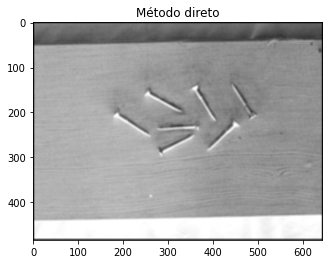

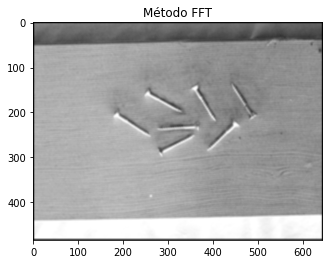

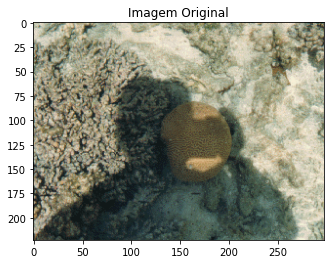

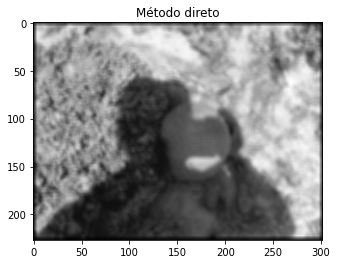

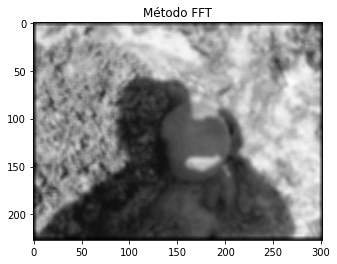

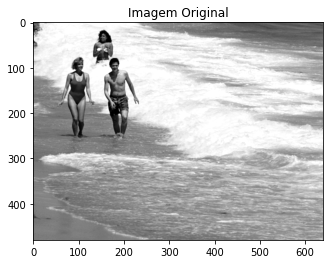

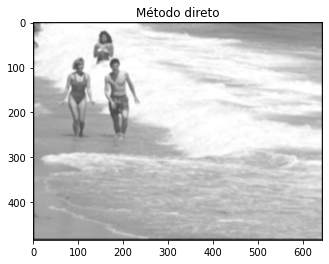

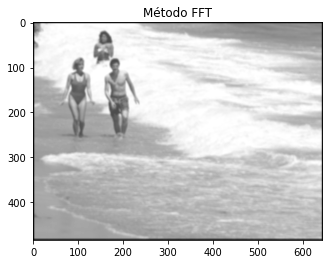

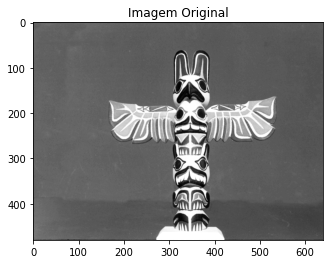

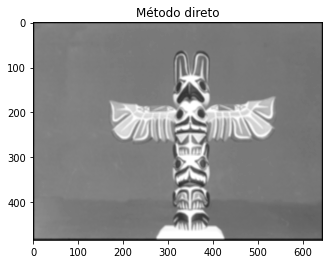

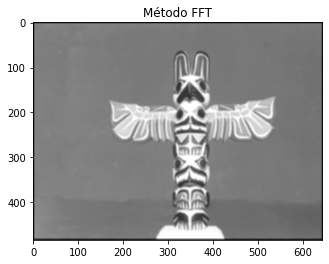

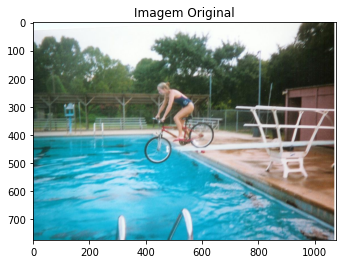

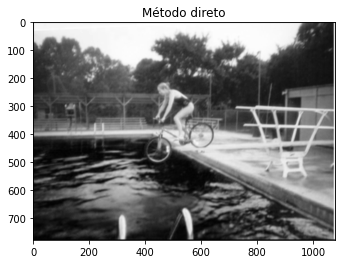

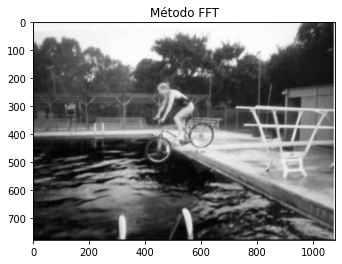

In [ ]:
# imagem variável e filtro fixo
filtro = random_matrix(5,5)
for imageName in os.listdir('Fotos'):
    img = plt.imread('Fotos/' + imageName)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title("Imagem Original")
    
    if img.ndim == 3:
        img = img[:,:,0]

    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10, True)
    plt.figure()
    plt.imshow(imgDirect(), cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT(), cmap='gray')
    plt.title("Método FFT")